<a href="https://colab.research.google.com/github/ArshaHaridas/Data-Science-lab/blob/main/naivebays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
import numpy as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

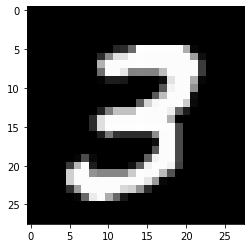

In [ ]:
plt.imshow(x_train[7].reshape((28, 28)), cmap = 'gray')

In [ ]:
nb_model = GaussianNB()
fit_nb = nb_model.fit(x_train, y_train)
predictions = fit_nb.predict(x_test)
con_matrix = confusion_matrix(y_test, predictions)
print(con_matrix)

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]


In [ ]:
def diagonal_sum(con_matrix):
  sum = 0
  for i in range(10):
    for j in range(10):
      if i == j:
        sum = sum + con_matrix[i, j]
  return sum

sum = diagonal_sum(con_matrix)
print(f'Sum : {sum}')
print(f'Accuracy %: {sum/10000}')


Sum : 5558
Accuracy %: 0.5558


In [ ]:
predictions_2 = fit_nb.predict(x_train)
con_matrix_2 = confusion_matrix(y_train, predictions_2)
print(con_matrix_2)

[[5206    9   33   16    9   13  165    5  356  111]
 [   4 6341   15   33    3   12   74    4  173   83]
 [ 484  152 1786  474   33   37 1443   17 1444   88]
 [ 274  295   49 2277   11   15  268   46 2274  622]
 [ 114   39   49   33 1027   35  483   21 1259 2782]
 [ 525  122   33  125   34  336  273   11 3411  551]
 [  47   92   25    3    4   19 5572    0  148    8]
 [  27   36    9   54   51    8   15 1919  190 3956]
 [  88  722   23   51   19   33   80    6 3802 1027]
 [  30   31   17    7   33    4    4   83  112 5628]]


In [ ]:
sum_2 = diagonal_sum(con_matrix_2)
print(f'Sum : {sum_2}')
print(f'Accuracy %: {sum_2/60000}')

Sum : 33894
Accuracy %: 0.5649


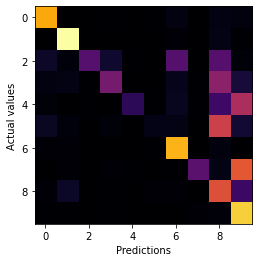

In [ ]:
plt.imshow(con_matrix, cmap = 'inferno', interpolation = 'nearest')
plt.xlabel('Predictions')
plt.ylabel('Actual values')
plt.show()